![Autistic](https://www.proxzar.ai/wp-content/uploads/2019/07/AI-in-wholesale.png)

<a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">install libraries</p>

In [1]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.23 in c:\users\hp\anaconda3\lib\site-packages (from seaborn) (1.4.2)



In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


<a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">import libraries</p>

In [120]:
import os
import pandas as pd # data frame
import numpy as np # manipulate N-dimensional arrays
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualization 
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,classification_report,recall_score
from sklearn.metrics import plot_confusion_matrix,make_scorer
from sklearn import metrics
from frlearn.feature_preprocessors import FRFS
%matplotlib inline

# Load the data

In [121]:
df = pd.read_csv('Wholesale_customers_data.csv', header=0)

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">DATA UNDERSTANDING</p>

- Wholesale customers data, il fait référence aux clients d'un grossiste répartiteur. Il comprend les dépenses annuelles en unités monétaires (mu) sur diverses catégories de produits, il contient 8 attributs (FRAIS, LAIT, ÉPICERIE, SURGELES, DETERGENTS_PAPIER, CHARCUTERIE, CANAL, RÉGION). 
- La thématique qu’on peut résoudre avec ce dataset c’est une classification des données selon par exemple la région, ou bien en peut utiliser l’attribut Channel (Canal) pour construire deux classes **Customers channel** et **Retail channel** 


In [122]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [124]:
df.isnull().sum().sort_values(ascending=False)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">DataFrame size</p>

In [125]:
print(f'Dimensions de la  dataframe est : {df.shape}')

Dimensions de la  dataframe est : (440, 8)


- ce dataset possède 8 **features** et 440 **tuples**

In [126]:
import warnings
warnings.filterwarnings("ignore")

<a id="4.2"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Features type</p>

In [127]:
pd.DataFrame(df.dtypes,
             columns = ["Type"])

,Type
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


- ce dataset comporte que des feartures numérique et ne possède aucun feature catégorique 

<a id="5"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Information about the data</p>

- 1) FRESH: annual spending (m.u.) on fresh products.
- 2) MILK: annual spending (m.u.) on milk products.
- 3) GROCERY: annual spending (m.u.)on grocery products.
- 4) FROZEN: annual spending (m.u.)on frozen products.
- 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products.
- 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products.
- 7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel.
- 8) REGION: customers Region â€“ Lisnon, Oporto or Other (Nominal)

- Quelques statistiques sur les données 

In [128]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [129]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#5233FF")

,Missing Values
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


- Après vérification, on constate que notre dataset n'as pas des valeurs manquantes

### Valeurs unique dans le dataset

In [130]:
#Affichage des valeurs uniques de chaque Colonne du dataset
for col in df:
    print("Column", col,"unique values: ",df[col].unique())

Column Channel unique values:  [2 1]
Column Region unique values:  [3 1 2]
Column Fresh unique values:  [ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  

- cela permet de voir les differentes valeurs uniques du dataset pour chaque colonne, et si jamais y'a des valeurs non uniques, on peu les fusionner.

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Visualisation</p>

 **comprendre la distribution des données de différentes caractéristiques en utilisant les histogrammes.**

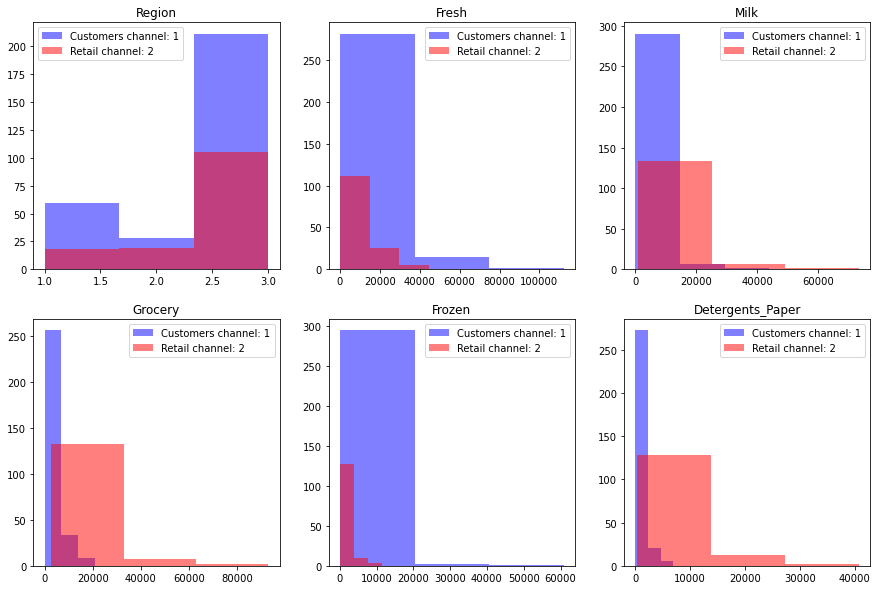

In [131]:
df1 = pd.DataFrame(df, columns=['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Channel'])
# separate the data into two dataframes based on the label
df_0 = df[df['Channel']==1]
df_1 = df[df['Channel']==2]
# create histograms for each feature for each label
fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs = axs.ravel()
for i, feature in enumerate(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper']):
    axs[i].hist(df_0[feature], bins=3, alpha=0.5, label='Customers channel: 1', color='blue')
    axs[i].hist(df_1[feature], bins=3, alpha=0.5, label='Retail channel: 2', color='red')
    axs[i].set_title(feature)
    axs[i].legend()
plt.show()

**Moyenne de chaque attribut dans notre Dataset**

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

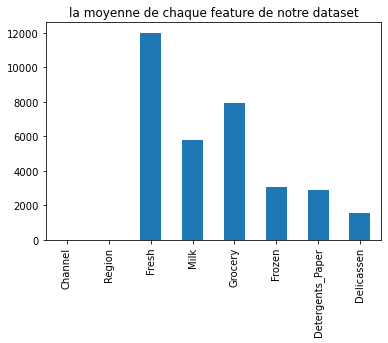

In [132]:
means = df
means.mean(skipna=True).plot(kind='bar',title="la moyenne de chaque feature de notre dataset")
means.mean()

**Mediane de chaque attribut dans notre Dataset**

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

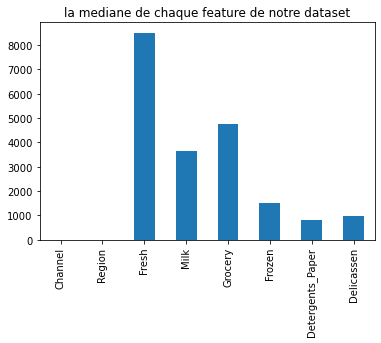

In [133]:
means.median().plot(kind='bar',title="la mediane de chaque feature de notre dataset")

#affichage des mediannes des colonnes à part
means.median()

**le mode de chaque feature dans notre Dataset**

<AxesSubplot:title={'center':'la mode de chaque feature de notre dataset'}>

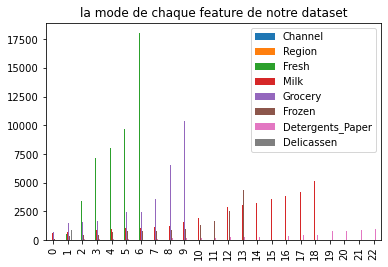

In [134]:
means.mode(dropna=True).plot(kind='bar',title="la mode de chaque feature de notre dataset")

**le max de chaque feature dans notre Dataset**

<AxesSubplot:title={'center':'la max de chaque feature de notre dataset'}>

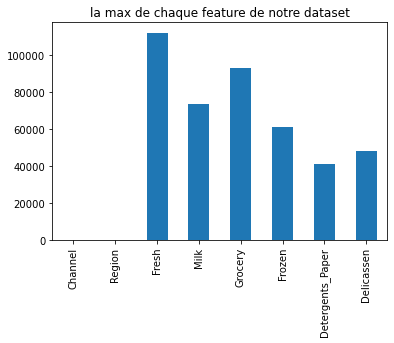

In [135]:
means.max().plot(kind='bar',title="la max de chaque feature de notre dataset")

<AxesSubplot:title={'center':'Graphe affichant la distribution des features'}>

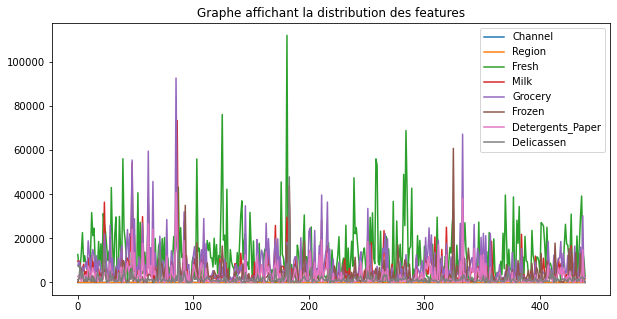

In [136]:
df.plot(figsize=(10,5),title="Graphe affichant la distribution des features")

**Affichage d'un graphe qui représente la quantité de chaque feature**

Les quantitées du dataset


<AxesSubplot:title={'center':'Graphe affichant les differents quantiles des attributs'}>

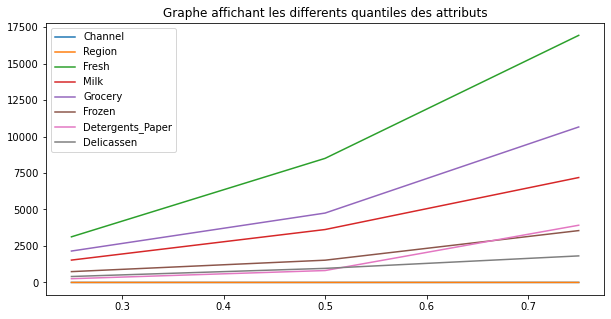

In [137]:
print("Les quantitées du dataset")
x_ = means.quantile([0.25,0.5,0.75])
x_.plot(figsize=(10,5),title="Graphe affichant les differents quantiles des attributs")

**Histogrammes des Densités**

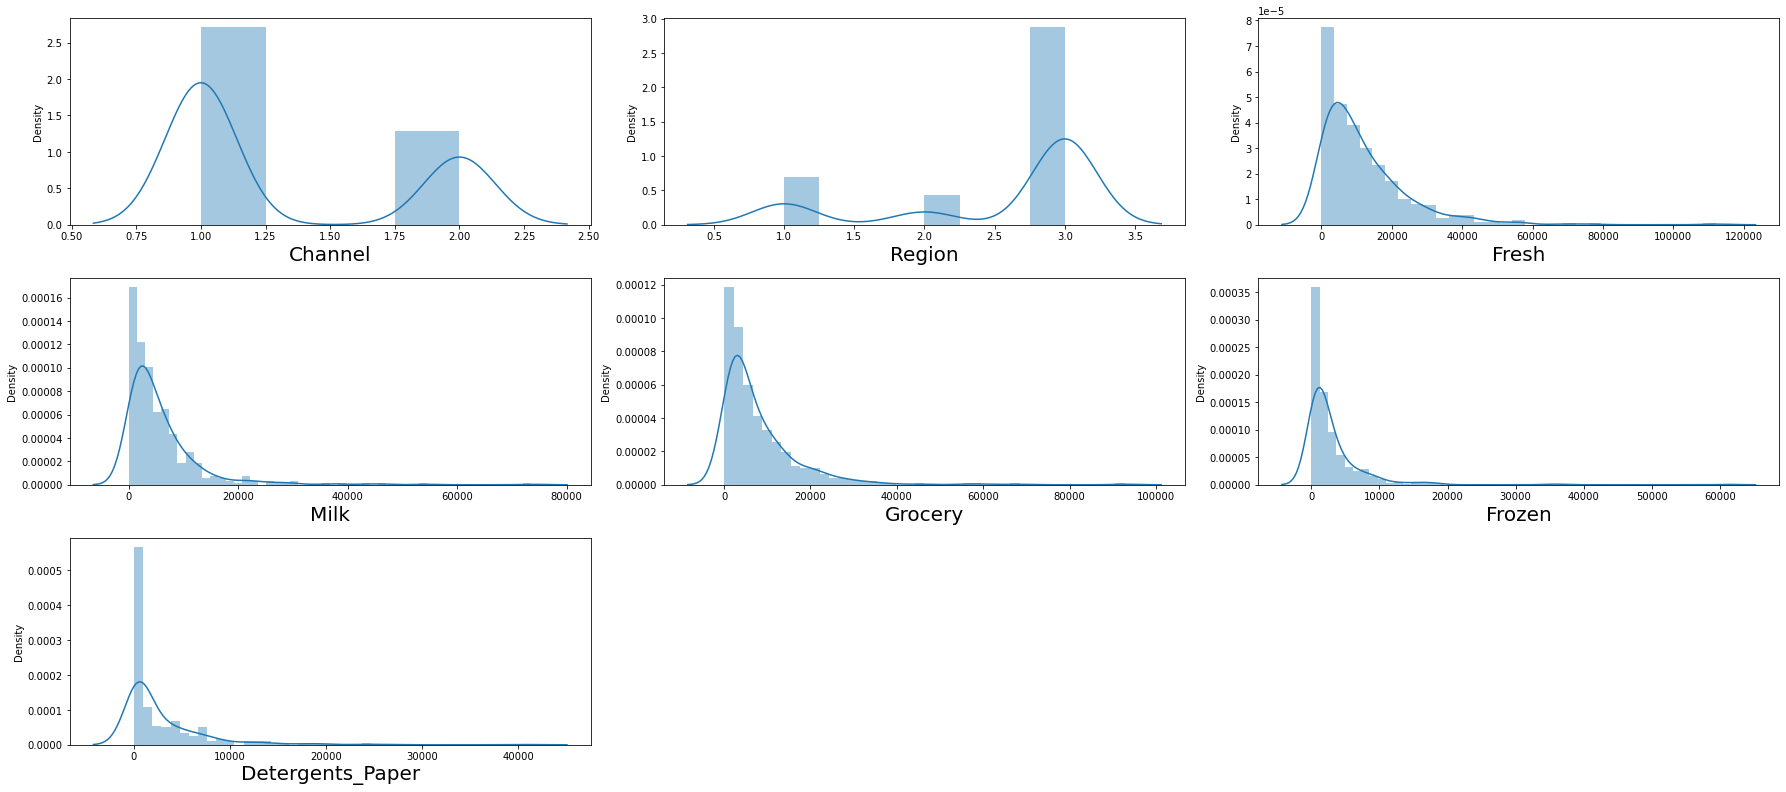

In [138]:
plt.figure(figsize=(25,25), facecolor='white')
plotnumber=1

for column in df.columns[0:len(df.columns)-1]:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**Visualisation de ces outliers :**

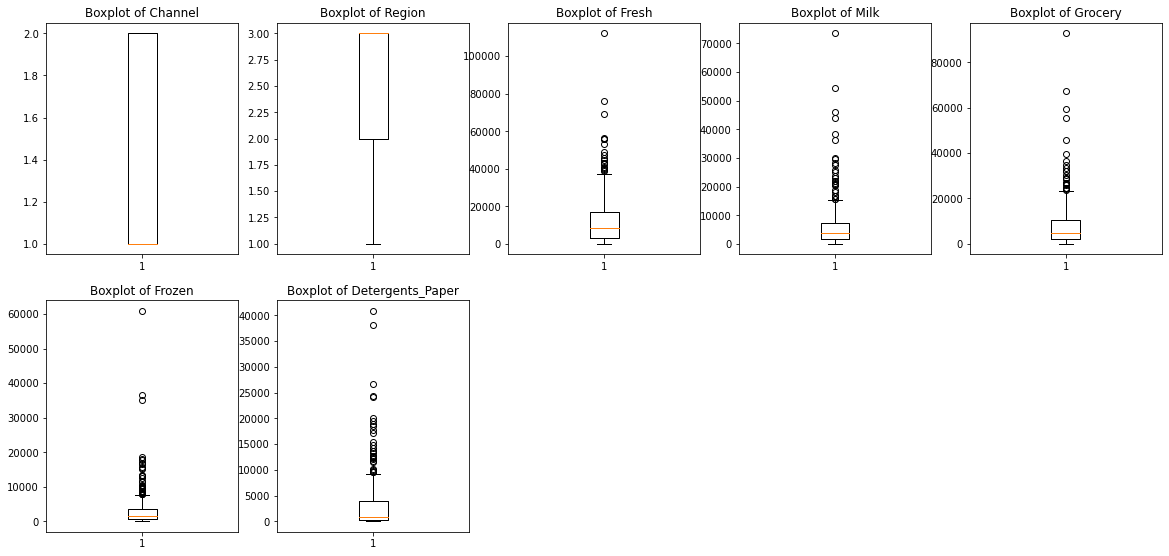

In [139]:
plt.figure(figsize=(20,40))

for i, column in enumerate(df.columns[0:len(df.columns)-1]):
    plt.subplot(len(df.columns), 5, i+1)
    plt.boxplot(df[column])
    plt.title("Boxplot of {}".format(column))
    
plt.show()

- On a pas d'outliers dans ce dataset

In [140]:
import plotly.express as px

In [141]:
fig = px.histogram(df, x="Channel",                   
                   template='plotly_dark',
                   color_discrete_sequence = ["#20124d"])

fig.update_layout(title = "<b>Repartition des données selon l'attribut 'Channel'</b>",
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [142]:
#df["Channel"] = np.where(df["Channel"] == 1, "Customers channel", "Retail channel")
fig = px.pie(df, names = "Channel",
             title = "<b>Repartition des données selon l'attribut 'Channel' dans le dataset</b>",
             hole = 0.5, template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

- **D’après les deux figure au dessus, en remarque que la classe majoritaire dans notre dataset c'est la classe 1 qui fait reference au produit livrées  par le canal Horeca (Hôtel/Restaurant/Café).**
- **A noter que Horeca signifie "Hôtels, Restaurants et Cafétérias". C'est un terme utilisé pour décrire les entreprises dans le secteur de la restauration commerciale.**

In [143]:
#df22 = df
#df22["Region"] = df2["Region"].replace({1: "Lisbon", 2: "Porto", 3: "Other Region"})
fig = px.histogram(df, x="Region",                   
                   template='plotly_dark',
                   color_discrete_sequence = ["#20124d"])

fig.update_layout(title = "<b>Repartition des données selon l'attribut 'Region' dans le dataset</b>",
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [144]:
#df["Region"] = np.where(df["Region"] == 1, "Lisbon", np.where(df["Region"] == 2, "Porto", "Other Region"))
fig = px.pie(df, names = "Region",
             title = "<b>Repartition des données selon l'attribut 'Region' dans le dataset</b>",
             hole = 0.5, template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

- **Dans cette figure en s’intéresse a la distribution des produits selon les région, dans notre cas on a 3 classes qui déterminent 3 région qui sont Lisbonne, Porto et autres Région. en voit bien que la classes majoritaire c'est la classe "Other Region". ce qui signifie que on a plus de client dans cette classe, en deuxième position on a Lisbonne puis en dernier on a Porto.**

In [145]:
Channel_Region_wise = pd.DataFrame(df[df['Channel'] == 1]['Region'].value_counts()).rename({"Region":"Channel_par_Region_Counts"}, axis = 1)

Channel_Region_wise.style.bar(color="#3B9978") 

,Channel_par_Region_Counts
3,211
1,59
2,28


In [146]:
# Créer une nouvelle colonne "Region_Name" avec les noms de régions correspondants
#region_names = {1: "Lisbon", 2: "Porto", 3: "Other Region"}
#df["Region_Name"] = df["Region"].map(region_names)
#Channel_Region_wise = Channel_Region_wise.rename(index={1: "Lisbon", 2: "Porto", 3: "Other Region"})
fig = px.bar(data_frame = Channel_Region_wise,
             x = Channel_Region_wise.index, 
             y = "Channel_par_Region_Counts",
             labels = {"index" : "Region"},     
             color_discrete_sequence = px.colors.qualitative.D3_r,
             template='plotly_dark')

fig.update_xaxes(tickangle = 310)

fig.update_layout(title={
        'text': "<b>Nombre de Channnel (Channel = 1 ) par Region</b>",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


In [147]:
label = Channel_Region_wise.index
value = Channel_Region_wise['Channel_par_Region_Counts']
#Channel_Region_wise = Channel_Region_wise.rename(index={1: "Lisbon", 2: "Porto", 3: "Other Region"})

fig = go.Figure(data=[go.Pie(labels = label,
                             values = value,
                             rotation = 90)])

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_text="<b>Nombre de Channnel (Channel = 1 ) par Region</b>",
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15,
                  template='plotly_dark')

fig.show()

Text(0.5, 1.0, "Repartition des valeurs de 'Channel' en fonction des 'Region'")

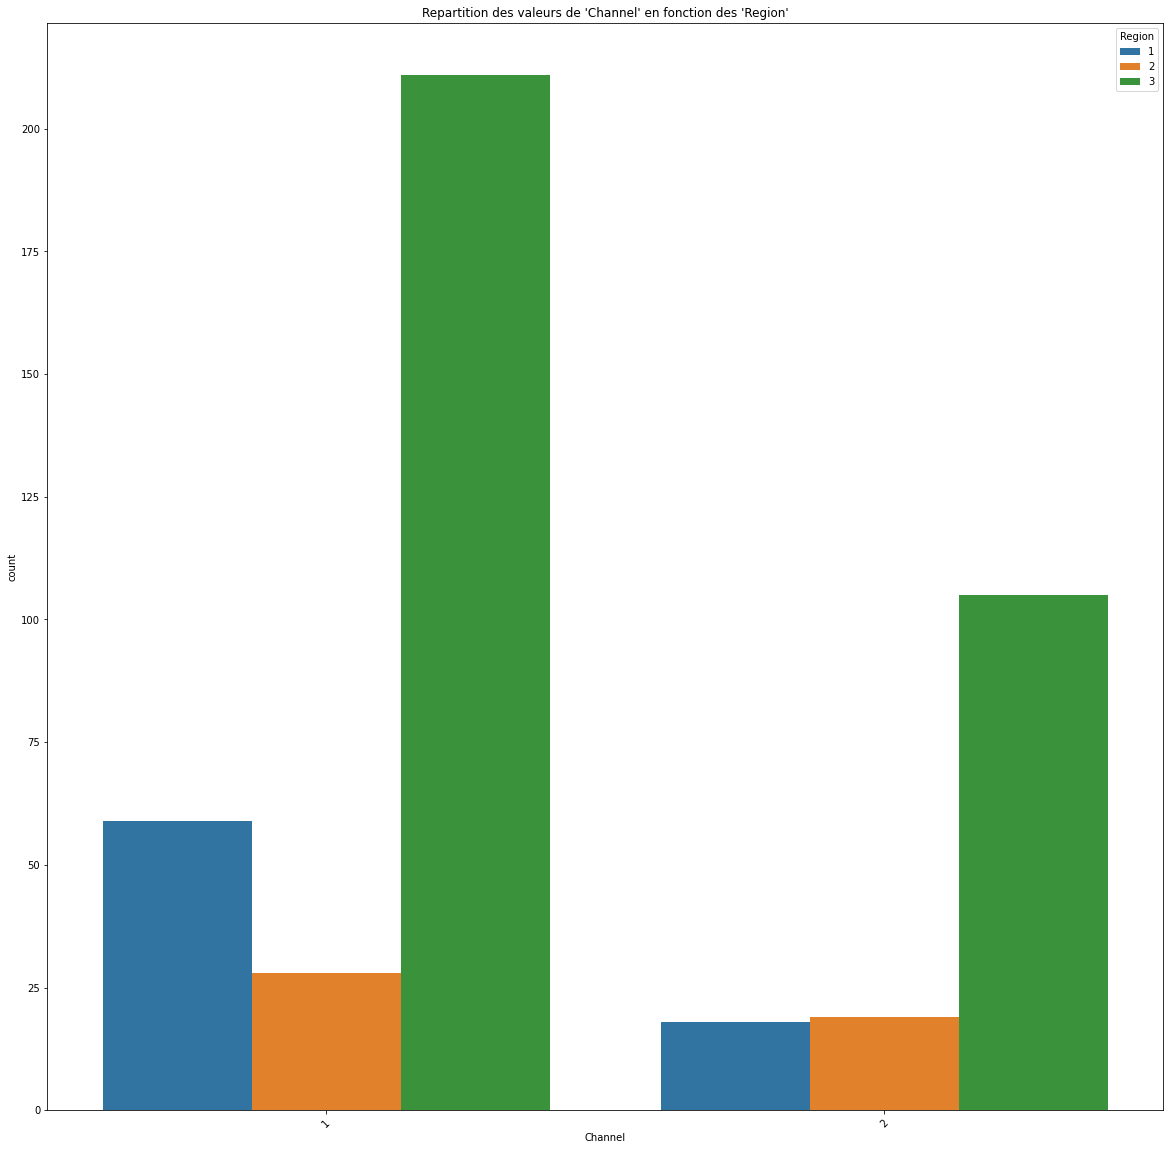

In [148]:
#df["Channel"] = df["Channel"].replace({1: "Customers Channel", 2: "Retail Channel"})
plt.figure(figsize = (20,20))
df_for_count = df.copy()
df_for_count.drop(df_for_count.loc[df_for_count["Region"]=="?","Region"].index,inplace=True)

ax = sns.countplot(x="Channel",hue="Region",data=df_for_count)
plt.setp(ax.artists,alpha=.5,linewidth=2,edgecolor="k")
plt.xticks(rotation=45)
plt.title("Repartition des valeurs de 'Channel' en fonction des 'Region'")

Text(0.5, 1.0, "Repartition des valeurs de 'Channel' en fonction des 'Fresh'")

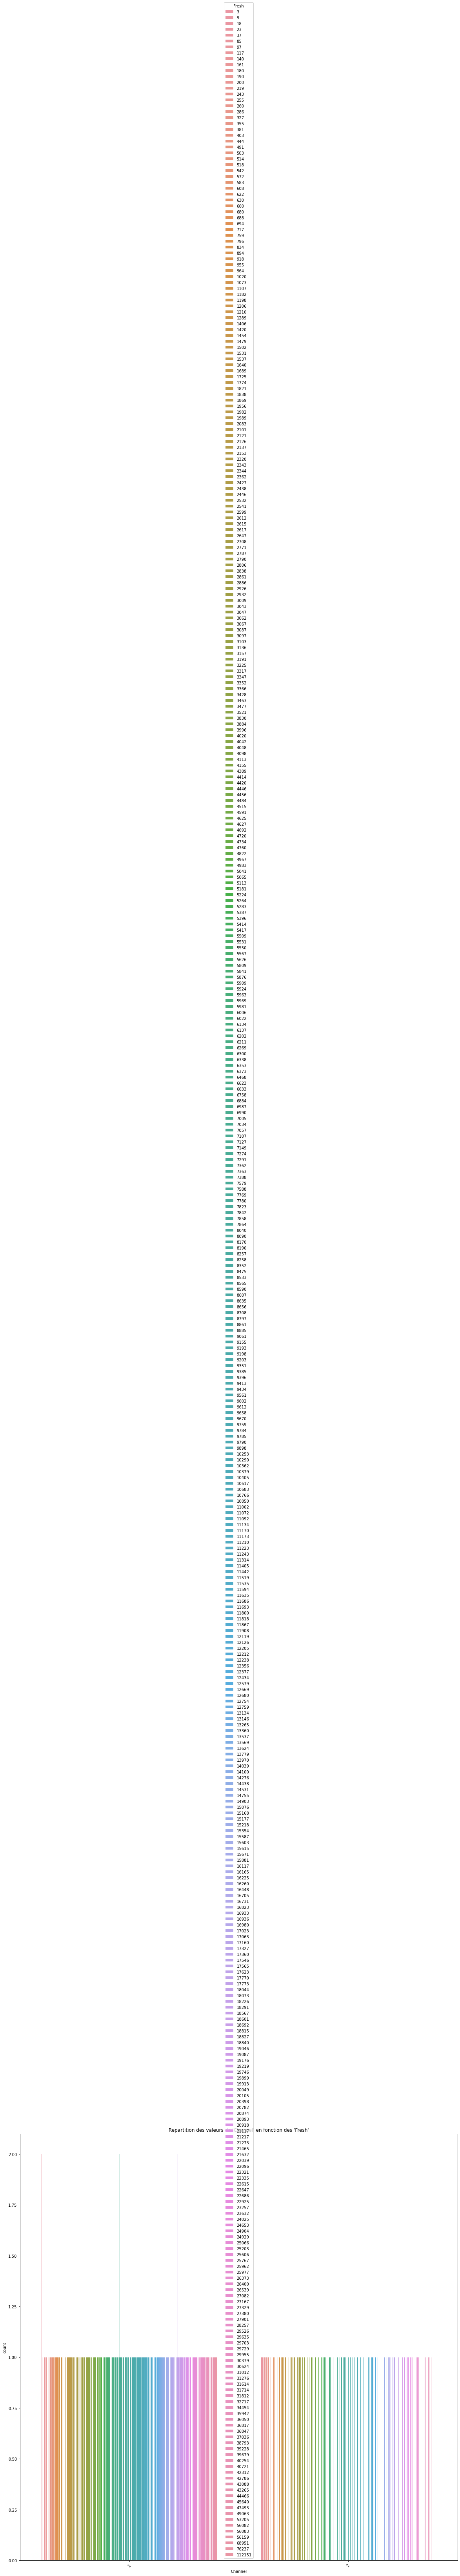

In [149]:
plt.figure(figsize = (20,20))
df_for_count = df.copy()
df_for_count.drop(df_for_count.loc[df_for_count["Fresh"]=="?","Fresh"].index,inplace=True)

ax = sns.countplot(x="Channel",hue="Fresh",data=df_for_count)
plt.setp(ax.artists,alpha=.5,linewidth=2,edgecolor="k")
plt.xticks(rotation=45)
plt.title("Repartition des valeurs de 'Channel' en fonction des 'Fresh'")

Text(0.5, 1.0, "Repartition des valeurs de 'Channel' en fonction des 'Detergents_Paper'")

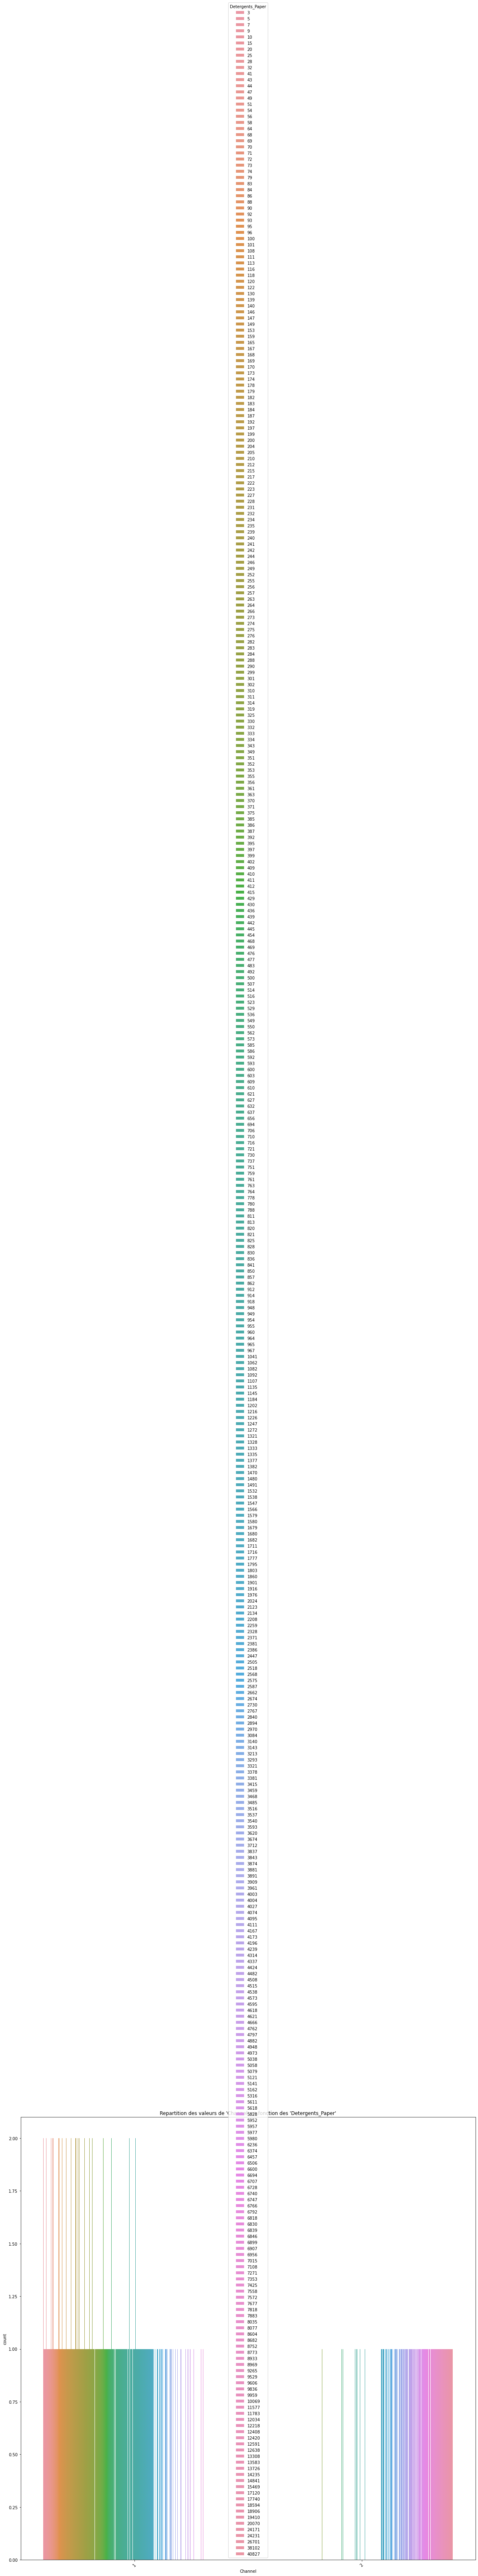

In [150]:
plt.figure(figsize = (20,20))
df_for_count = df.copy()
df_for_count.drop(df_for_count.loc[df_for_count["Detergents_Paper"]=="?","Detergents_Paper"].index,inplace=True)

ax = sns.countplot(x="Channel",hue="Detergents_Paper",data=df_for_count)
plt.setp(ax.artists,alpha=.5,linewidth=2,edgecolor="k")
plt.xticks(rotation=45)
plt.title("Repartition des valeurs de 'Channel' en fonction des 'Detergents_Paper'")

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Cleaninig</p>

Apres vérification (si notre dataset possède des valeurs manquantes) on a trouvé que ce dernier il est complet et il ne possède aucune valeurs manquantes (Nan).
La figure montre bien que y’a pas de valeurs nulles. Dans le cas de valeurs manquantes, il existe 3 techniques pour remplacer les valeurs manquantes qui sont "Moyenne", "Médiane", et "Plus fréquent".

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Label encoding</p>


À partir des étapes ci-dessus, nous pouvons voir qu'il n'existe pas de attributs non numériques pour chaque enregistrement dans notre dataset, en général dans le cas ou on a des attributs catégorielles, scatter_matrix et certains algorithmes d'apprentissage s'attendent à ce que les données d'entrée soient numériques, ce qui nécessite la conversion des caractéristiques non numériques (appelées variables catégorielles). Une façon populaire de convertir les variables catégorielles est d'utiliser soit le **Label Encoding** ou le **One Hot Encoder**

En utilisant le **One Hot Encoder**, chaque valeur catégorielle est convertie en une nouvelle colonne et une valeur 1 ou 0 (notation vrai/faux) est affectée à la colonne. Par exemple, si dans chaque `i` colonne on a `Xi` valeurs distinctes, le One Hot Encoder  rajouteras `Somme(Xi)` colonnes à un dataFrame ce qui est quand même beaucoup.

En utilisant le **Label Encoding**, chaque valeur est mappée en une unique valeur sans colision. Cette méthode présente par contre un unconvenient:  les valeurs numériques peuvent être mal interprétées par les algorithmes  quand celles-ci ont une sorte de hiérarchie/ordre entre elles.


<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Oversampling avec l'algorithme SMOTE</p>

Le déséquilibre des données reflète généralement une distribution inégale des classes dans un ensemble de données.


- Effectuer l'aprentissage pour un model sur de données déséquilibrées peut être dangereux. Car si la précision est utilisée pour mesurer la qualité d'un modèle, un modèle qui classe tous les échantillons testés dans la catégorie "**1**" (**Channel = 1) peut être dangereux. (**Channel = 1**) aura une excellente précision (99,8 %), mais il est évident que ce modèle ne nous fournira aucune information précieuse. En effet, il aura appris que tout le phénomème s'explique avec les données de la classe majoritaire.
- Afin de corriger ce problème, nous avons deux possibilités : soit augmenter le nombre d'instance de la classe minoritaire (`oversampling`) soit diminuer le nombre d'instances de la classe majoritaire (`undersampling`).
- dans notre cas en va utiliser la methode smote qui est une methode d'oversamling pour équilibré les classes


In [151]:
fig = px.pie(df, names = "Channel",
             title = "<b>Proportion de chaque classe Avant SMOTE</b>",
             template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [152]:
# Oversample with SMOTE for imbalanced dataset

from imblearn.over_sampling import SMOTE
from collections import Counter
seed = 5
smote = SMOTE(sampling_strategy='auto', random_state=seed,k_neighbors=7)
xi, y = smote.fit_resample(df,df["Channel"])

Counter(y)

Counter({2: 298, 1: 298})

In [153]:
df = xi
df["Channel"] = y

In [154]:
#df["Channel"] = np.where(df["Channel"] == 1, "Customers channel", "Retail channel")
fig = px.pie(df, names = "Channel",
             title = "<b>Proportion de chaque classe après SMOTE</b>",
             template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploratory data analysis</p>

In [155]:
#EXTRAIRE X ET Y
y = pd.DataFrame({'Channel': df['Channel']}) 
x = df.drop('Channel', axis = 1)

<AxesSubplot:title={'center':'Graphe affichant la distribution des features'}>

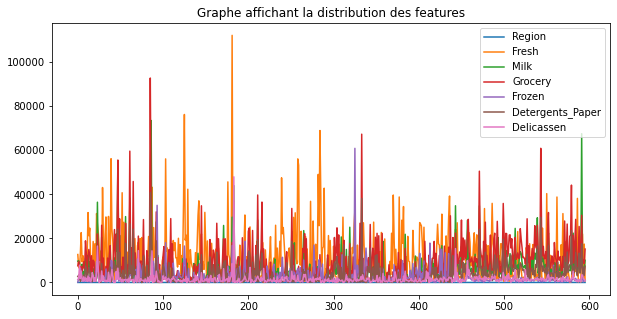

In [156]:
x.plot(figsize=(10,5),title="Graphe affichant la distribution des features")

In [157]:
y

,Channel
0,2
1,2
2,2
3,1
4,2
...,...
591,2
592,2
593,2
594,2


<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature Selection Algorithms</p>

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">ROUGH SET</p>

- Le principe repose sur l'idée de définir une réduction d'un ensemble de données en utilisant une relation d'équivalence pour regrouper les objets similaires en un seul concept. 
- Les objets qui ne peuvent pas être classés de manière définitive dans un concept sont considérés comme incertains ou flous. 

In [158]:
# Fonction qui calcule toutes les combinaisons possibles entre les attributs de base
import itertools
def recup_liste_combinaisons(): 

    attributs = ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
    liste_combinaison = []

    for i in range(1,len(attributs)):
        combinaisons = itertools.combinations(attributs,i)
        liste_combinaison.append(combinaisons)

    return liste_combinaison

In [159]:
liste_combinaison = recup_liste_combinaisons()

# recuperer les dataset des combinaisons

In [160]:
attributs = ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
List_df = [] #liste qui va contenir les df des combinaisons 
for i in range(0,len(liste_combinaison)):
    for j in liste_combinaison[i]:
        df_temp = x
        for k in range(0,len(attributs)):
            if(attributs[k] not in j): # supprimer les attributs qui n'apparritiennent pas a j(liste_combinaison) 
                df_temp =  df_temp.drop(attributs[k], axis = 1)              
        List_df.append(df_temp)

## Calculer la Positive Region

In [161]:
def positive_region(data):
    X = data.values.tolist()
    Y = y.values.tolist()
    Positive_Region = []
    for i in range(len(data)):
        List_lower = [] #creer une liste pour lower approxi
        List_lower.append(i) #Ajouter le premier element
        boolean = False # creer un boolean pour savoir si on est sorti avec le break
        for j in range(0,len(data)):
            if (X[i] == X[j]):
                if (Y[i] == Y[j]):
                    List_lower.append(j)
                else:
                    boolean = True
                    break
        if (boolean == False):
            for k in range(len(List_lower)):
                Positive_Region.append(List_lower[k])
    return Positive_Region 

## Recuperer les reduct

In [162]:
positve_region_all = positive_region(x)

In [163]:
reduct = []
for i in List_df:
    if(set(positve_region_all) == set(positive_region(i))):
        reduct.append(i)

**Afficher les reduct**

In [164]:
reduct

[     Grocery
 0       7561
 1       9568
 2       7684
 3       4221
 4       7198
 ..       ...
 591    30487
 592     9775
 593    10272
 594     8536
 595    15148
 
 [596 rows x 1 columns],
      Region  Grocery
 0         3     7561
 1         3     9568
 2         3     7684
 3         3     4221
 4         3     7198
 ..      ...      ...
 591       3    30487
 592       3     9775
 593       3    10272
 594       3     8536
 595       3    15148
 
 [596 rows x 2 columns],
      Fresh   Milk
 0    12669   9656
 1     7057   9810
 2     6353   8808
 3    13265   1196
 4    22615   5410
 ..     ...    ...
 591  23480  67524
 592  21764   6765
 593   1006   5372
 594  17407   5622
 595    699  10048
 
 [596 rows x 2 columns],
      Fresh  Grocery
 0    12669     7561
 1     7057     9568
 2     6353     7684
 3    13265     4221
 4    22615     7198
 ..     ...      ...
 591  23480    30487
 592  21764     9775
 593   1006    10272
 594  17407     8536
 595    699    15148
 
 [596

In [165]:
len(reduct)

115

In [166]:
x_RST = reduct[10]
x_RST

,Milk,Delicassen
0,9656,1338
1,9810,1776
2,8808,7844
3,1196,1788
4,5410,5185
...,...,...
591,67524,3419
592,6765,3384
593,5372,1639
594,5622,1479


<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">QuickReduct</p>

- QuickReduct est un algorithme de la famille Rough set.
- QuickReduct est un algorithme qui permet de déterminer les attributs minimaux qui sont nécessaires pour distinguer les objets dans un ensemble de données avec une certaine précision.

**la premiere etape consiste a transformer notre dataset en une liste qui contient des listes.**

In [167]:
U = df.values.tolist()
U = [[index] + value for index , value in enumerate(U) ]

In [168]:
U

[[0, 2, 3, 12669, 9656, 7561, 214, 2674, 1338],
 [1, 2, 3, 7057, 9810, 9568, 1762, 3293, 1776],
 [2, 2, 3, 6353, 8808, 7684, 2405, 3516, 7844],
 [3, 1, 3, 13265, 1196, 4221, 6404, 507, 1788],
 [4, 2, 3, 22615, 5410, 7198, 3915, 1777, 5185],
 [5, 2, 3, 9413, 8259, 5126, 666, 1795, 1451],
 [6, 2, 3, 12126, 3199, 6975, 480, 3140, 545],
 [7, 2, 3, 7579, 4956, 9426, 1669, 3321, 2566],
 [8, 1, 3, 5963, 3648, 6192, 425, 1716, 750],
 [9, 2, 3, 6006, 11093, 18881, 1159, 7425, 2098],
 [10, 2, 3, 3366, 5403, 12974, 4400, 5977, 1744],
 [11, 2, 3, 13146, 1124, 4523, 1420, 549, 497],
 [12, 2, 3, 31714, 12319, 11757, 287, 3881, 2931],
 [13, 2, 3, 21217, 6208, 14982, 3095, 6707, 602],
 [14, 2, 3, 24653, 9465, 12091, 294, 5058, 2168],
 [15, 1, 3, 10253, 1114, 3821, 397, 964, 412],
 [16, 2, 3, 1020, 8816, 12121, 134, 4508, 1080],
 [17, 1, 3, 5876, 6157, 2933, 839, 370, 4478],
 [18, 2, 3, 18601, 6327, 10099, 2205, 2767, 3181],
 [19, 1, 3, 7780, 2495, 9464, 669, 2518, 501],
 [20, 2, 3, 17546, 4519, 4602, 

**cette fontion permet d'avoir les differentes classes** 

In [169]:
def equivalence_partition( iterable , index ):
    classes = []
    dclasses = {}
    for o in iterable: # for each object
        # find the class it is in
        found = False
        for c in classes:
            indice_ele = next(iter(c))
            element = [iterable[indice_ele][ind] == o[ind] for ind in index]
            if all(element): # is it equivalent to this class?
                c.add( o[0])
                dclasses[o[0]] = c
                found = True
                break
        if not found: # it is in a new class
            classes.append( set([o[0]]))
            dclasses[o[0]] = classes[-1]
    return classes,dclasses

**une fois les classes sont bien calculees on va calcluer la "Lower Approximation" de chaque classes**

In [170]:
def lower_appr(B):
    ind_B = equivalence_partition( U , B )[1]
    ind_d = equivalence_partition( U , D )[1]
    lower_appr_set = set()
    for x,ele in enumerate(U):
        if ind_B[x].issubset(ind_d[x]):
            lower_appr_set.add(x)
    return lower_appr_set

- **Maintenant on va calculer Gamma qui fait reference a la dependency de chauque attribut.**
- **Ce dernier est calcule en divisant la lower approximation trouvee dans l'etape precedante sur l'ensemble des attributs.**

In [171]:
def gamma(B):
    return float(len(lower_appr(B)))/float(len(U))

**cette fonction permet de recuperer le bon reduct qui contient les attributs minimaux qui conservent l'intégrité d'un ensemble de données, en d'autre terme la dependency du reduct doit etre egale a la dependency de l'ensmeble.**

In [172]:
def qreduct(C):
    R = set()
    while True:
        T = R
        for x in C-R:
             if gamma(R.union(set([x]))) > gamma(T):
                T = R.union(set([x]))
        R = T
        if gamma(R) == gamma(C):
                break
    return R

In [173]:
decision=len(df.columns)#_________ defining the decision index
D = [decision]           
B = set([ i for i in range(1,decision)]) #__________ defining condition index
Features= qreduct(B)

In [174]:
Features

{3, 4}

In [175]:
df_Quick = pd.DataFrame(df, columns=['Fresh', 'Milk'])

In [176]:
df_Quick.head()

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


In [177]:
x_QR = df_Quick

**Après avoir appliquer Rough set et QuickReduct en vois bien que le reduct généré par QuikReduct il est inclus dans rough set**  

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Fuzzy Rough Set</p>

- Fuzzy Rough est une extension de Rough Sets qui intègre la notion de flou dans la réduction d'un ensemble de données.
- consiste à utiliser des niveaux de pertinence flous pour évaluer la similitude entre les objets dans un ensemble de données.

In [178]:
y1 = y.astype('int')
#y.to_numpy()

In [179]:
# Sélectionner les meilleurs attributs en utilisant la méthode de sélection de caractéristiques FRFS
preprocessor = FRFS() # n_features = 2
model = preprocessor(x.values, y1.values)
X_selected = model(x.values)

In [180]:
X_selected

array([[12669,  9656,  7561,   214],
       [ 7057,  9810,  9568,  1762],
       [ 6353,  8808,  7684,  2405],
       ...,
       [ 1006,  5372, 10272,   239],
       [17407,  5622,  8536,  1239],
       [  699, 10048, 15148,   807]], dtype=int64)

In [181]:
df_Fuzzy = pd.DataFrame(X_selected, columns=['Fresh', 'Milk', 'Grocery', 'Frozen'])

In [182]:
df_Fuzzy.head()

,Fresh,Milk,Grocery,Frozen
0,12669,9656,7561,214
1,7057,9810,9568,1762
2,6353,8808,7684,2405
3,13265,1196,4221,6404
4,22615,5410,7198,3915


In [183]:
x_F = df_Fuzzy

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pearson Corrélation</p>


In [184]:
x_PR = x 
y_PR = y

In [185]:
# SÉPARATION EN DEUX JEUX DE DONNÉES avec un ratio de 1/5
X_train4, X_test4, y_train4, y_test4 = train_test_split(x_PR, y_PR, test_size=0.2, random_state=42,stratify=y)

In [186]:
X_train4.shape, X_test4.shape

((476, 7), (120, 7))

In [187]:
X_train4.corr()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,1.000000,0.085245,-0.003630,-0.048968,-0.032932,-0.044942,0.030979
Fresh,0.085245,1.000000,-0.007847,-0.123315,0.324205,-0.213710,0.233454
Milk,-0.003630,-0.007847,1.000000,0.765619,0.114417,0.696746,0.413022
Grocery,-0.048968,-0.123315,0.765619,1.000000,-0.068347,0.914703,0.204472
Frozen,-0.032932,0.324205,0.114417,-0.068347,1.000000,-0.158092,0.400775
Detergents_Paper,-0.044942,-0.213710,0.696746,0.914703,-0.158092,1.000000,0.067550
Delicassen,0.030979,0.233454,0.413022,0.204472,0.400775,0.067550,1.000000


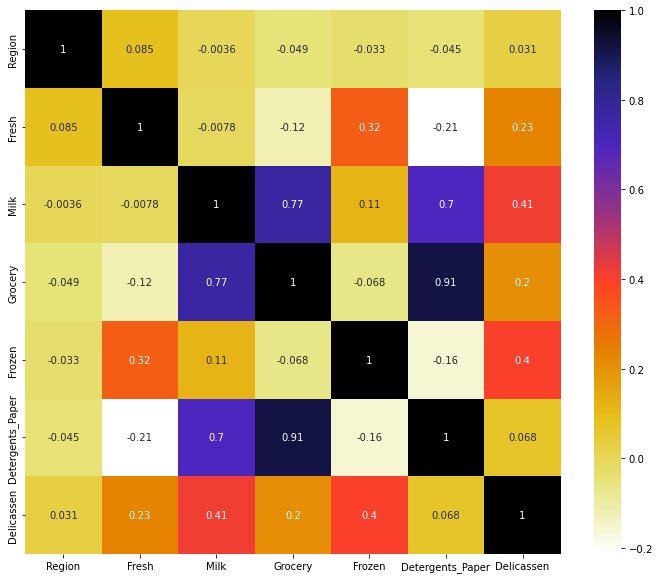

In [188]:
plt.figure(figsize=(12,10))
cor = X_train4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [189]:
# With the following function we can select highly correlated features 
# it will remove the first feature that is correlated with anything other features 
def correlation(dataset, threshold):
    col_corr = set() #set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i] # getting name of column
                col_corr.add(colname)
    return col_corr

In [190]:
corr_features = correlation(X_train4, 0.7)
len(set(corr_features))

2

In [191]:
corr_features

{'Detergents_Paper', 'Grocery'}

In [192]:
X_train4.drop(corr_features, axis=1)
X_test4.drop(corr_features, axis=1)

,Region,Fresh,Milk,Frozen,Delicassen
243,1,11210,3576,561,2398
332,2,22321,3216,2208,2602
408,3,8257,3880,1646,344
488,2,14911,11780,3788,2060
111,3,12579,11114,805,1519
...,...,...,...,...,...
286,3,7149,2247,1619,128
523,1,2361,6601,879,826
268,1,11908,8053,1069,698
333,2,8565,4980,131,1215


<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLASSIFICATION ALGORITHMS</p>


**Dans cette Dans cette section, nous allons appliquer deux algorithmes de classification (KNN ET Random Forest) sur chaque résultat (Attributs sélectionnés) des différents algorithmes de sélection de caractéristiques utilisés.**

## KNN

- consiste à assigner une classe à une nouvelle observation en se basant sur la classe majoritaire des k observations les plus proches dans le jeu de données d'entraînement.
- La similarité entre les observations est généralement mesurée à l'aide de la distance Euclidienne ou de toute autre mesure de distance.

## RANDOM FOREST

- Il construit un ensemble de modèles de décision (arbres de décision), puis il fait la combinaison de ses derniers pour ameliorer la performence du modele.

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Classification With Initial DataSet</p>

In [193]:
# SÉPARATION EN DEUX JEUX DE DONNÉES avec un ratio de 1/5
X_train0, X_test0, y_train0, y_test0 = train_test_split(df, y, test_size=0.2, random_state=42,stratify=y)

## (1) KNN

Maximum KNN Score is 95.00%


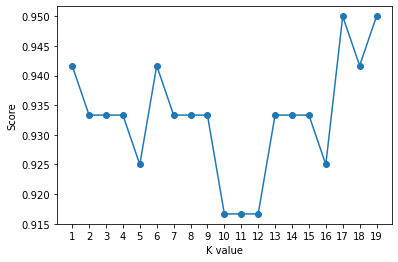

In [194]:
#Appliquez l’algorithme des k plus proches voisins, pour chaque valeur de k, de sorte a trouver le meilleur score. 

scoreList = []

k = range(1,20)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train0, y_train0)
    scoreList.append(knn.score(X_test0, y_test0))

print("Maximum KNN Score is {:.2f}%".format(max(scoreList) * 100))

for i in range(len(scoreList)):
    if(max(scoreList) == scoreList[i]):
        top_k = i+1

knn = KNeighborsClassifier(n_neighbors = top_k)  # n_neighbors means k
knn.fit(X_train0, y_train0)
y_pred_knn1 = knn.predict(X_test0)

plt.plot(range(1,20), scoreList,'o-')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [195]:
#Calcul du taux d'erreur : 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train0,y_train0)
#le taux de précision
y_test_pred0= knn.predict(X_test0)

#taux d'erreur
score = 1 - accuracy_score(y_test0, y_test_pred0)
score

0.05833333333333335

In [196]:
#Metric2 : CLASSIFICATION REPORT
m = classification_report(y_test0,y_test_pred0)
print("Knn")
print (m)

Knn
              precision    recall  f1-score   support

           1       0.95      0.93      0.94        60
           2       0.93      0.95      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.942\nF1_score=0.942\n recall_score=0.942\naccuracy=0.942')

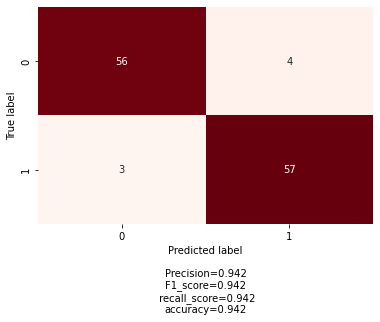

In [197]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score0 = precision_score(y_test0, y_test_pred0, average='micro')
F1_score0 = f1_score(y_test0, y_test_pred0, average='micro')
recall0 = recall_score(y_test0, y_test_pred0, average='micro')
accuracy0 = accuracy_score(y_test0, y_test_pred0)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test0, y_test_pred0)
sns.heatmap(result, annot=True,cmap='Reds',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score0,F1_score0,recall0,accuracy0)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text)

## (2) RANDOM FOREST

In [198]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [199]:
# Setup random seed
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf0 = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf0.fit(X_train0, y_train0);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [200]:
rs_rf0.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [201]:
rs_rf0.score(X_test0, y_test0)

1.0

In [202]:
y_test_pred0= rs_rf0.predict(X_test0)

In [203]:
m = classification_report(y_test0,y_test_pred0)
print("Random Forest")
print (m)

Random Forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=1.000\nF1_score=1.000\n recall_score=1.000\naccuracy=1.000')

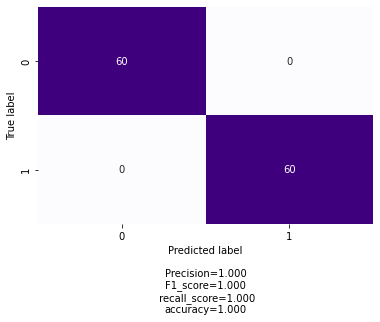

In [204]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score00 = precision_score(y_test0, y_test_pred0, average='micro')
F1_score00 = f1_score(y_test0, y_test_pred0, average='micro')
recall00 = recall_score(y_test0, y_test_pred0, average='micro')
accuracy00 = accuracy_score(y_test0, y_test_pred0)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test0, y_test_pred0)
sns.heatmap(result, annot=True,cmap='Purples',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score00,F1_score00,recall00,accuracy00)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text) 

## Roc Curve

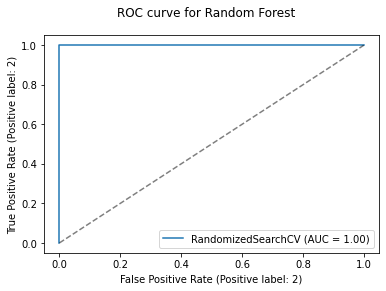

In [205]:
import matplotlib.pyplot as plt

# Plot ROC curve and calculate AUC metric
rfc_disp0 = plot_roc_curve(rs_rf0, X_test0, y_test0)

# Add diagonal line to the plot
rfc_disp0.ax_.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=.5)

# Set title and legend
rfc_disp0.figure_.suptitle("ROC curve for Random Forest")
plt.legend(loc='lower right')

# Show the plot
plt.show()


## comparison in terms of prediction performance between KNN and Random Forest

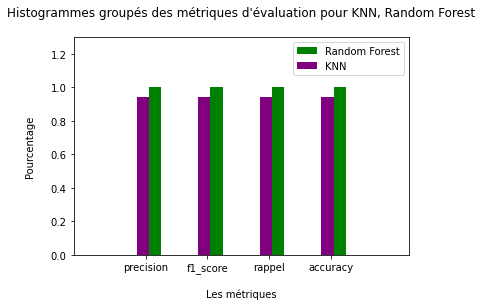

In [206]:
barWidth = 0.2
figsize = (10,6)
y1 = [precision_Score0,F1_score0,recall0,accuracy0]
y2 = [precision_Score00,F1_score00,recall00,accuracy00]
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

plt.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
            linewidth = 4)
plt.bar(r1, y1, width = barWidth, color = ['purple' for i in y1],
            linewidth = 2)

plt.xticks([r + barWidth / 4 for r in range(len(y1))], ['precision', 'f1_score', 'rappel', 'accuracy'])

plt.title("Histogrammes groupés des métriques d'évaluation pour KNN, Random Forest\n")
plt.margins(0.3)
plt.xlabel('\nLes métriques')
plt.ylabel('Pourcentage\n')
plt.legend(["Random Forest","KNN"])

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Classification With Rough Set</p>

In [207]:
# SÉPARATION EN DEUX JEUX DE DONNÉES avec un ratio de 1/5
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_RST, y, test_size=0.2, random_state=42,stratify=y)

## (1) KNN

Maximum KNN Score is 85.83%


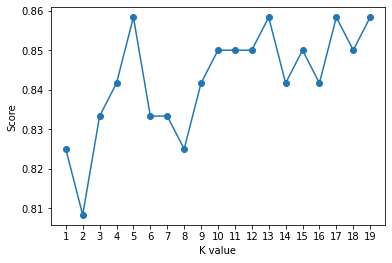

In [208]:
#Appliquez l’algorithme des k plus proches voisins, pour chaque valeur de k, de sorte a trouver le meilleur score. 

scoreList = []

k = range(1,20)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train1, y_train1)
    scoreList.append(knn.score(X_test1, y_test1))

print("Maximum KNN Score is {:.2f}%".format(max(scoreList) * 100))

for i in range(len(scoreList)):
    if(max(scoreList) == scoreList[i]):
        top_k = i+1

knn = KNeighborsClassifier(n_neighbors = top_k)  # n_neighbors means k
knn.fit(X_train1, y_train1)
y_pred_knn1 = knn.predict(X_test1)

plt.plot(range(1,20), scoreList,'o-')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [209]:
#Calcul du taux d'erreur : 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train1,y_train1)
#le taux de précision
y_test_pred1= knn.predict(X_test1)

#taux d'erreur
score = 1 - accuracy_score(y_test1, y_test_pred1)
score

0.17500000000000004

In [210]:
#Metric2 : CLASSIFICATION REPORT
m = classification_report(y_test1,y_test_pred1)
print("Knn")
print (m)

Knn
              precision    recall  f1-score   support

           1       0.84      0.80      0.82        60
           2       0.81      0.85      0.83        60

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.825\nF1_score=0.825\n recall_score=0.825\naccuracy=0.825')

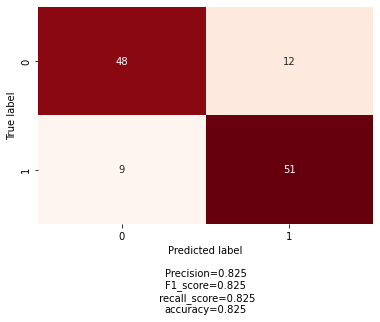

In [211]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score1 = precision_score(y_test1, y_test_pred1, average='micro')
F1_score1 = f1_score(y_test1, y_test_pred1, average='micro')
recall1 = recall_score(y_test1, y_test_pred1, average='micro')
accuracy1 = accuracy_score(y_test1, y_test_pred1)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test1, y_test_pred1)
sns.heatmap(result, annot=True,cmap='Reds',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score1,F1_score1,recall1,accuracy1)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text)

## (2) RANDOM FOREST

In [212]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [213]:
# Setup random seed
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf1 = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf1.fit(X_train1, y_train1);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [214]:
rs_rf1.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

In [215]:
rs_rf1.score(X_test1, y_test1)

0.825

In [216]:
y_test_pred1= rs_rf1.predict(X_test1)

In [217]:
m = classification_report(y_test1,y_test_pred1)
print("Random Forest")
print (m)

Random Forest
              precision    recall  f1-score   support

           1       0.85      0.78      0.82        60
           2       0.80      0.87      0.83        60

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.825\nF1_score=0.825\n recall_score=0.825\naccuracy=0.825')

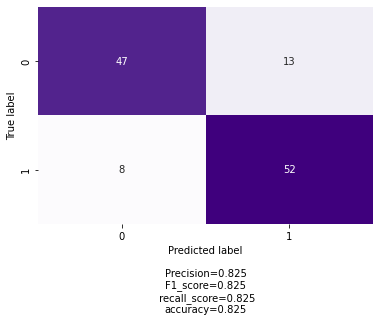

In [218]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score11 = precision_score(y_test1, y_test_pred1, average='micro')
F1_score11 = f1_score(y_test1, y_test_pred1, average='micro')
recall11 = recall_score(y_test1, y_test_pred1, average='micro')
accuracy11 = accuracy_score(y_test1, y_test_pred1)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test1, y_test_pred1)
sns.heatmap(result, annot=True,cmap='Purples',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score11,F1_score11,recall11,accuracy11)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text) 

## Roc Curve

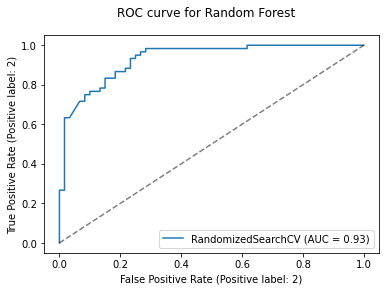

In [219]:
import matplotlib.pyplot as plt

# Plot ROC curve and calculate AUC metric
rfc_disp1 = plot_roc_curve(rs_rf1, X_test1, y_test1)

# Add diagonal line to the plot
rfc_disp1.ax_.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=.5)

# Set title and legend
rfc_disp1.figure_.suptitle("ROC curve for Random Forest")
plt.legend(loc='lower right')

# Show the plot
plt.show()

## comparison in terms of prediction performance between KNN and Random Forest 

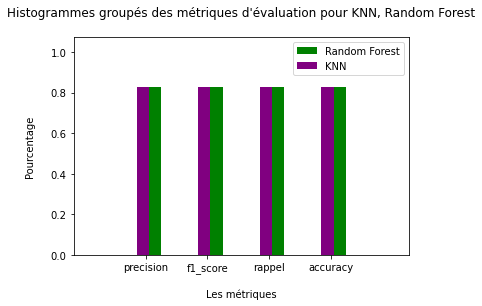

In [220]:
barWidth = 0.2
figsize = (10,6)
y1 = [precision_Score1,F1_score1,recall1,accuracy1]
y2 = [precision_Score11,F1_score11,recall11,accuracy11]
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

plt.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
            linewidth = 4)
plt.bar(r1, y1, width = barWidth, color = ['purple' for i in y1],
            linewidth = 2)

plt.xticks([r + barWidth / 4 for r in range(len(y1))], ['precision', 'f1_score', 'rappel', 'accuracy'])

plt.title("Histogrammes groupés des métriques d'évaluation pour KNN, Random Forest\n")
plt.margins(0.3)
plt.xlabel('\nLes métriques')
plt.ylabel('Pourcentage\n')
plt.legend(["Random Forest","KNN"])

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Classification With QuickReduct</p>

In [109]:
# SÉPARATION EN DEUX JEUX DE DONNÉES avec un ratio de 1/5
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_QR, y, test_size=0.2, random_state=42,stratify=y)

## (1) KNN

Maximum KNN Score is 87.50%


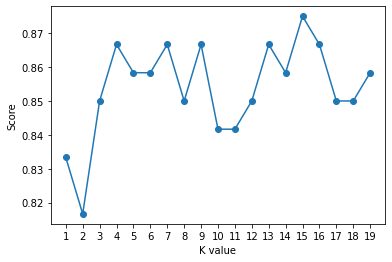

In [110]:
#Appliquez l’algorithme des k plus proches voisins, pour chaque valeur de k, de sorte a trouver le meilleur score. 

scoreList = []

k = range(1,20)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train2, y_train2)
    scoreList.append(knn.score(X_test2, y_test2))

print("Maximum KNN Score is {:.2f}%".format(max(scoreList) * 100))

for i in range(len(scoreList)):
    if(max(scoreList) == scoreList[i]):
        top_k = i+1

knn = KNeighborsClassifier(n_neighbors = top_k)  # n_neighbors means k
knn.fit(X_train2, y_train2)
y_pred_knn2 = knn.predict(X_test2)

plt.plot(range(1,20), scoreList,'o-')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [111]:
#Calcul du taux d'erreur : 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train2,y_train2)
#le taux de précision
y_test_pred2= knn.predict(X_test2)

#taux d'erreur
score = 1 - accuracy_score( y_test2, y_test_pred2)
score

0.16666666666666663

In [112]:
#Metric2 : CLASSIFICATION REPORT
m = classification_report(y_test2,y_test_pred2 )
print("Knn")
print (m)

Knn
              precision    recall  f1-score   support

           1       0.87      0.78      0.82        60
           2       0.80      0.88      0.84        60

    accuracy                           0.83       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.833\nF1_score=0.833\n recall_score=0.833\naccuracy=0.833')

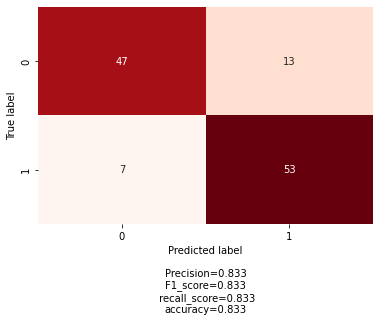

In [113]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score2 = precision_score(y_test2, y_test_pred2, average='micro')
F1_score2 = f1_score(y_test2, y_test_pred2, average='micro')
recall2 = recall_score(y_test2, y_test_pred2, average='micro')
accuracy2 = accuracy_score(y_test2, y_test_pred2)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test2, y_test_pred2)
sns.heatmap(result, annot=True,cmap='Reds',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score2,F1_score2,recall2,accuracy2)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text)

## (2) RANDOM FOREST

In [114]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [115]:
# Setup random seed
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf2 = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf2.fit(X_train2, y_train2);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [116]:
rs_rf2.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [117]:
rs_rf2.score(X_test2, y_test2)

0.85

In [221]:
y_test_pred2= rs_rf2.predict(X_test2)

In [222]:
m = classification_report(y_test2,y_test_pred2)
print("Random Forest")
print (m)

Random Forest
              precision    recall  f1-score   support

           1       0.86      0.83      0.85        60
           2       0.84      0.87      0.85        60

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.850\nF1_score=0.850\n recall_score=0.850\naccuracy=0.850')

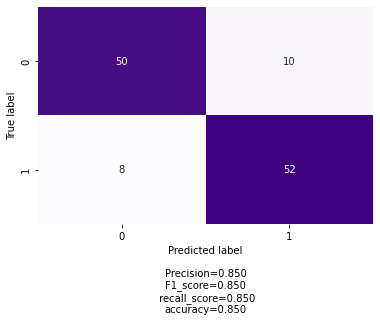

In [223]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score22 = precision_score(y_test2, y_test_pred2, average='micro')
F1_score22 = f1_score(y_test2, y_test_pred2, average='micro')
recall22 = recall_score(y_test2, y_test_pred2, average='micro')
accuracy22 = accuracy_score(y_test2, y_test_pred2)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test2, y_test_pred2)
sns.heatmap(result, annot=True,cmap='Purples',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score22,F1_score22,recall22,accuracy22)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text) 

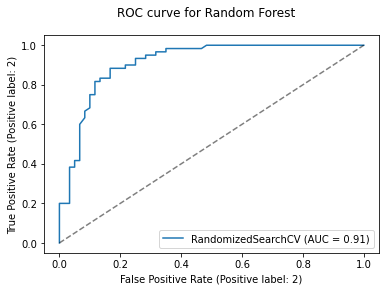

In [224]:
import matplotlib.pyplot as plt

# Plot ROC curve and calculate AUC metric
rfc_disp2 = plot_roc_curve(rs_rf2, X_test2, y_test2)

# Add diagonal line to the plot
rfc_disp2.ax_.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=.5)

# Set title and legend
rfc_disp2.figure_.suptitle("ROC curve for Random Forest")
plt.legend(loc='lower right')

# Show the plot
plt.show()

## comparison in terms of prediction performance between KNN and Random Forest 

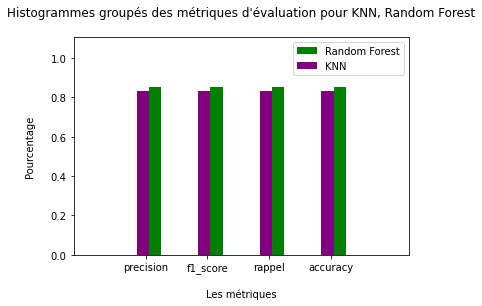

In [225]:
barWidth = 0.2
figsize = (10,6)
y1 = [precision_Score2,F1_score2,recall2,accuracy2]
y2 = [precision_Score22,F1_score22,recall22,accuracy22]
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

plt.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
            linewidth = 4)
plt.bar(r1, y1, width = barWidth, color = ['purple' for i in y1],
            linewidth = 2)

plt.xticks([r + barWidth / 4 for r in range(len(y1))], ['precision', 'f1_score', 'rappel', 'accuracy'])

plt.title("Histogrammes groupés des métriques d'évaluation pour KNN, Random Forest\n")
plt.margins(0.3)
plt.xlabel('\nLes métriques')
plt.ylabel('Pourcentage\n')
plt.legend(["Random Forest","KNN"])

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Classification With Fuzzy Rough Set</p>

In [226]:
# SÉPARATION EN DEUX JEUX DE DONNÉES avec un ratio de 1/5
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_F, y, test_size=0.2, random_state=42,stratify=y)

## (1) KNN

Maximum KNN Score is 92.50%


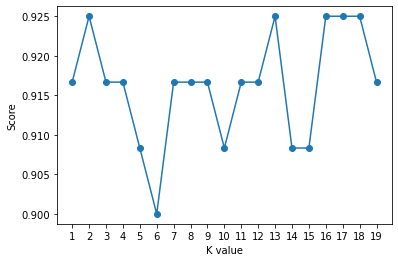

In [227]:
#Appliquez l’algorithme des k plus proches voisins, pour chaque valeur de k, de sorte a trouver le meilleur score. 

scoreList = []

k = range(1,20)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train3, y_train3)
    scoreList.append(knn.score(X_test3, y_test3))

print("Maximum KNN Score is {:.2f}%".format(max(scoreList) * 100))

for i in range(len(scoreList)):
    if(max(scoreList) == scoreList[i]):
        top_k = i+1

knn = KNeighborsClassifier(n_neighbors = top_k)  # n_neighbors means k
knn.fit(X_train3, y_train3)
y_pred_knn3 = knn.predict(X_test3)

plt.plot(range(1,20), scoreList,'o-')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [228]:
#Calcul du taux d'erreur : 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train3,y_train3)
#le taux de précision
y_test_pred3= knn.predict(X_test3)

#taux d'erreur
score = 1 - accuracy_score( y_test3, y_test_pred3)
score

0.08333333333333337

In [229]:
#Metric2 : CLASSIFICATION REPORT
m = classification_report(y_test3,y_test_pred3)
print("Knn")
print (m)

Knn
              precision    recall  f1-score   support

           1       0.93      0.90      0.92        60
           2       0.90      0.93      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.917\nF1_score=0.917\n recall_score=0.917\naccuracy=0.917')

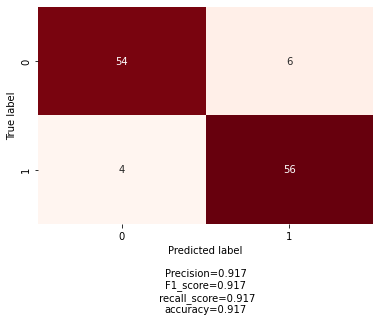

In [230]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score3 = precision_score(y_test3, y_test_pred3, average='micro')
F1_score3 = f1_score(y_test3, y_test_pred3, average='micro')
recall3 = recall_score(y_test3, y_test_pred3, average='micro')
accuracy3 = accuracy_score(y_test3, y_test_pred3)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test3, y_test_pred3)
sns.heatmap(result, annot=True,cmap='Reds',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score3,F1_score3,recall3,accuracy3)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text)

## (2) RANDOM FOREST

In [231]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [232]:
# Setup random seed
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf3 = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf3.fit(X_train3, y_train3);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [233]:
rs_rf3.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [252]:
rs_rf3.score(X_test3, y_test3)

0.9416666666666667

In [234]:
y_test_pred3= rs_rf3.predict(X_test3)

In [235]:
m = classification_report(y_test3,y_test_pred3)
print("Random Forest")
print (m)

Random Forest
              precision    recall  f1-score   support

           1       0.95      0.93      0.94        60
           2       0.93      0.95      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.942\nF1_score=0.942\n recall_score=0.942\naccuracy=0.942')

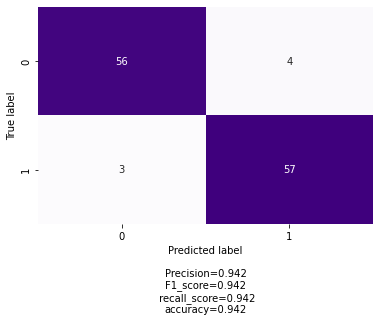

In [236]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score33 = precision_score(y_test3, y_test_pred3, average='micro')
F1_score33 = f1_score(y_test3, y_test_pred3, average='micro')
recall33 = recall_score(y_test3, y_test_pred3, average='micro')
accuracy33 = accuracy_score(y_test3, y_test_pred3)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test3, y_test_pred3)
sns.heatmap(result, annot=True,cmap='Purples',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score33,F1_score33,recall33,accuracy33)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text) 

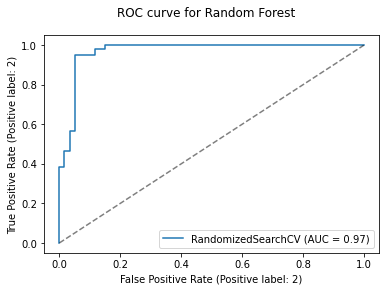

In [237]:
import matplotlib.pyplot as plt

# Plot ROC curve and calculate AUC metric
rfc_disp3 = plot_roc_curve(rs_rf3, X_test3, y_test3)

# Add diagonal line to the plot
rfc_disp3.ax_.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=.5)

# Set title and legend
rfc_disp3.figure_.suptitle("ROC curve for Random Forest")
plt.legend(loc='lower right')

# Show the plot
plt.show()

## comparison in terms of prediction performance between KNN and Random Forest 

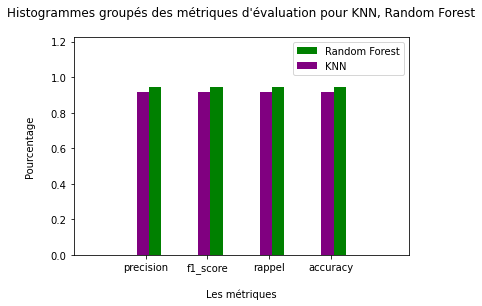

In [238]:
barWidth = 0.2
figsize = (10,6)
y1 = [precision_Score3,F1_score3,recall3,accuracy3]
y2 = [precision_Score33,F1_score33,recall33,accuracy33]
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

plt.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
            linewidth = 4)
plt.bar(r1, y1, width = barWidth, color = ['purple' for i in y1],
            linewidth = 2)

plt.xticks([r + barWidth / 4 for r in range(len(y1))], ['precision', 'f1_score', 'rappel', 'accuracy'])

plt.title("Histogrammes groupés des métriques d'évaluation pour KNN, Random Forest\n")
plt.margins(0.3)
plt.xlabel('\nLes métriques')
plt.ylabel('Pourcentage\n')
plt.legend(["Random Forest","KNN"])

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Pearson Corrélation</p>

## (1) KNN

Maximum KNN Score is 95.00%


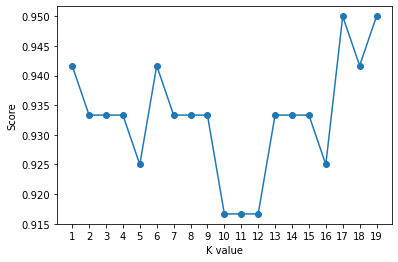

In [239]:
#Appliquez l’algorithme des k plus proches voisins, pour chaque valeur de k, de sorte a trouver le meilleur score. 

scoreList = []

k = range(1,20)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train4, y_train4)
    scoreList.append(knn.score(X_test4, y_test4))

print("Maximum KNN Score is {:.2f}%".format(max(scoreList) * 100))

for i in range(len(scoreList)):
    if(max(scoreList) == scoreList[i]):
        top_k = i+1

knn = KNeighborsClassifier(n_neighbors = top_k)  # n_neighbors means k
knn.fit(X_train4, y_train4)
y_pred_knn4 = knn.predict(X_test4)

plt.plot(range(1,20), scoreList,'o-')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [240]:
#Calcul du taux d'erreur : 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train4,y_train4)
#le taux de précision
y_test_pred4= knn.predict(X_test4)

#taux d'erreur
score = 1 - accuracy_score( y_test4, y_test_pred4)
score

0.05833333333333335

In [241]:
#Metric2 : CLASSIFICATION REPORT
m = classification_report(y_test4,y_test_pred4 )
print("Knn")
print (m)

Knn
              precision    recall  f1-score   support

           1       0.95      0.93      0.94        60
           2       0.93      0.95      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.942\nF1_score=0.942\n recall_score=0.942\naccuracy=0.942')

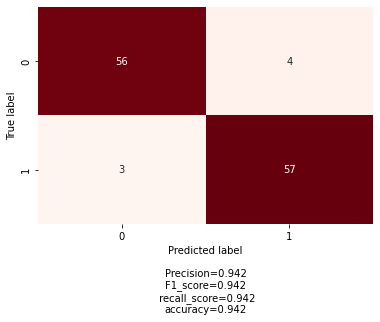

In [242]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score4 = precision_score(y_test4, y_test_pred4, average='micro')
F1_score4 = f1_score(y_test4, y_test_pred4, average='micro')
recall4 = recall_score(y_test4, y_test_pred4, average='micro')
accuracy4 = accuracy_score(y_test4, y_test_pred4)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test4, y_test_pred4)
sns.heatmap(result, annot=True,cmap='Reds',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score4,F1_score4,recall4,accuracy4)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text)

## (2) RANDOM FOREST

In [243]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [244]:
# Setup random seed
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf4 = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf4.fit(X_train4, y_train4);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [245]:
rs_rf4.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [246]:
rs_rf4.score(X_test4, y_test4)

0.975

In [247]:
y_test_pred4= rs_rf4.predict(X_test4)

In [248]:
m = classification_report(y_test4,y_test_pred4 )
print("Random Forest")
print (m)

Random Forest
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        60
           2       0.95      1.00      0.98        60

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Text(0.5, 15.0, 'Predicted label\n\nPrecision=0.975\nF1_score=0.975\n recall_score=0.975\naccuracy=0.975')

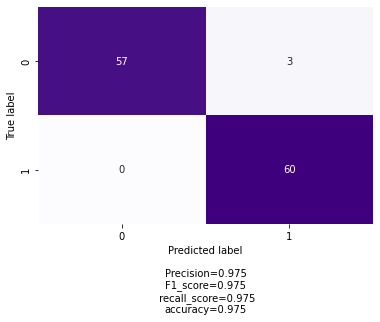

In [249]:
# Affichage des resultats (les valeurs des métriques)

# Calcul les valeurs des métriques 
precision_Score44 = precision_score(y_test4, y_test_pred4, average='micro')
F1_score44 = f1_score(y_test4, y_test_pred4, average='micro')
recall44 = recall_score(y_test4, y_test_pred4, average='micro')
accuracy44 = accuracy_score(y_test4, y_test_pred4)

# Affichage de la matrice de confusion
result = confusion_matrix(y_test4, y_test_pred4)
sns.heatmap(result, annot=True,cmap='Purples',cbar=False)

# Affichage les valeurs des métriques
stats_text = "\n\nPrecision={:0.3f}\nF1_score={:0.3f}\n recall_score={:0.3f}\naccuracy={:0.3f}".format(precision_Score44,F1_score44,recall44,accuracy44)
plt.ylabel('True label') 
plt.xlabel('Predicted label' + stats_text) 

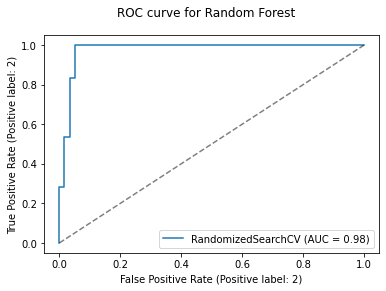

In [250]:
import matplotlib.pyplot as plt

# Plot ROC curve and calculate AUC metric
rfc_disp4 = plot_roc_curve(rs_rf4, X_test4, y_test4)

# Add diagonal line to the plot
rfc_disp4.ax_.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=.5)

# Set title and legend
rfc_disp4.figure_.suptitle("ROC curve for Random Forest")
plt.legend(loc='lower right')

# Show the plot
plt.show()

## comparison in terms of prediction performance between KNN and Random Forest 

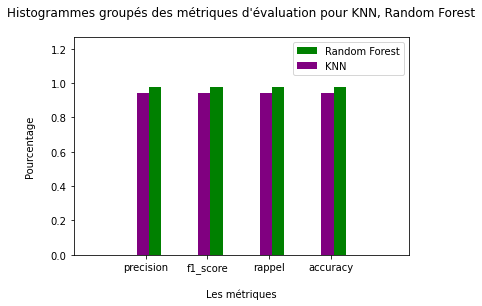

In [251]:
barWidth = 0.2
figsize = (10,6)
y1 = [precision_Score4,F1_score4,recall4,accuracy4]
y2 = [precision_Score44,F1_score44,recall44,accuracy44]
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

plt.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
            linewidth = 4)
plt.bar(r1, y1, width = barWidth, color = ['purple' for i in y1],
            linewidth = 2)

plt.xticks([r + barWidth / 4 for r in range(len(y1))], ['precision', 'f1_score', 'rappel', 'accuracy'])

plt.title("Histogrammes groupés des métriques d'évaluation pour KNN, Random Forest\n")
plt.margins(0.3)
plt.xlabel('\nLes métriques')
plt.ylabel('Pourcentage\n')
plt.legend(["Random Forest","KNN"])

# <a id="4.1"></a>
<p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Synthèse</p>

**Dans les différentes comparaisons qu'on effectuer sur les ensembles de données si dessus, on remarque bien que Random Forest a été plus performant sur toutes les métriques que KNN, sauf pour RST et cela revient** :
  - Robustesse aux données bruitées: Random Forest est plus robuste aux données bruitées et peut toujours fournir des résultats cohérents malgré la présence de données aberrantes. KNN, en revanche, peut être fortement affecté par les données aberrantes.
  - Plusieurs arbres sont utilisés pour faire des prévisions.
  
**Pour le cas de RST KNN a du prendre L'avance et cela revient a la simplicité et la rapidité du modèle.**
**Aussi ce modelé KNN est considéré plus adapté pour les cas où les données d'entraînement sont très détaillées.**

<a id="7"></a>
# <p style="background-color:#5233FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">ALGORITHMS COMPARAISON</p>


**Dans cette première partie de l’étape de comparaison nous allons faire la comparaison entre les résultats obtenu après application de Random forest sur les features sélectionnes par les différents Algorithmes de features Selection**

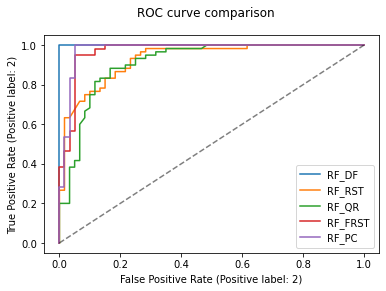

In [254]:
rfc_disp0 = plot_roc_curve(rs_rf0, X_test0, y_test0)
rfc_disp1 = metrics.plot_roc_curve(rs_rf1, X_test1, y_test1, ax=rfc_disp0.ax_)
rfc_disp2 = metrics.plot_roc_curve(rs_rf2, X_test2, y_test2, ax=rfc_disp0.ax_)
rfc_disp3 = metrics.plot_roc_curve(rs_rf3, X_test3, y_test3, ax=rfc_disp0.ax_)
rfc_disp4 = metrics.plot_roc_curve(rs_rf4, X_test4, y_test4, ax=rfc_disp0.ax_)
rfc_disp0.ax_.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=.5)
rfc_disp1.figure_.suptitle("ROC curve comparison")
plt.legend(["RF_DF", "RF_RST","RF_QR", "RF_FRST", "RF_PC"])

## Synthèse

**D’après la figure si dessus en remarque bien que la performance parfaite soit obtenu avec le dataset initial dont on a tous les feature. En effet les résultats de prédiction de Random Forest appliqué sur "Paerson Correlation" sont meilleur que tous les autres et beaucoup proche des résultats du dataset initial, puis en a en deuxième position le RF_FRST, et enfin RF_RST avec une tous petite différence avec QuickReduct (donc en peut dire qu'ils sont au même niveau).**

**Cela revient a la qualité des reduct generees par chaque Algorithme de feature sélection.**

**Dans cette deuxieme partie de l’étape de comparaison nous allons faire la comparaison entre les résultats obtenu après application de KNN sur les features sélectionnes par les différents Algorithmes de features Selection**

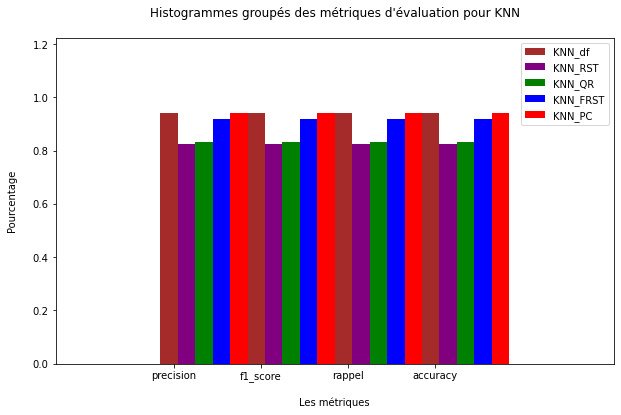

In [273]:
barWidth = 0.2
plt.figure(figsize=(10,6))
y0 = [precision_Score0,F1_score0,recall0,accuracy0]
y1 = [precision_Score1,F1_score1,recall1,accuracy1]
y2 = [precision_Score2,F1_score2,recall2,accuracy2]
y3 = [precision_Score3,F1_score3,recall3,accuracy3]
y4 = [precision_Score4,F1_score4,recall4,accuracy4]
r0 = range(len(y0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r0, y0, width = barWidth, color = ['brown' for i in y0],
            linewidth = 2)
plt.bar(r1, y1, width = barWidth, color = ['purple' for i in y0],
            linewidth = 2)
plt.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
            linewidth = 4)
plt.bar(r3, y3, width = barWidth, color = ['blue' for i in y2],
            linewidth = 2)
plt.bar(r4, y4, width = barWidth, color = ['red' for i in y3],
            linewidth = 2)
plt.xticks([r + barWidth / 4 for r in range(len(y1))], ['precision', 'f1_score', 'rappel', 'accuracy'])
plt.title("Histogrammes groupés des métriques d'évaluation pour KNN\n")
plt.margins(0.3)
plt.xlabel('\nLes métriques')
plt.ylabel('Pourcentage\n')
plt.legend(["KNN_df","KNN_RST","KNN_QR", "KNN_FRST", "KNN_PC"])

**D’après la figure si dessus en voit bien que la différence en terme de performance de prédiction entre notre classifier KNN appliqué sur chaque reduct est très petite. le plus performant entre eux en termes d’évaluation des métriques c'est le KNN du dataset initial, presque au même niveau on a KNN de Pearson Correlation, puis c'est KNN_FRST suivi et en dernière position on trouve KNN QuickReduct qui presque a la même performance de prédiction que KNN RST. 
Cela peut être du a la qualité des reduct produit par les différents algorithmes de feature selection ainsi au comportement de l'algorithme KNN dans le processus de traitement des données de chaque Reduct.**

## Conclusion 

- Les algorithmes de sélection de caractéristiques Rough set, QuickReduct, Fuzzy rough set et Pearson Correlation sont tous des méthodes utiles pour sélectionner les caractéristiques les plus importantes dans un jeu de données. 
- Chacun de ces algorithmes a ses propres avantages et inconvénients en termes de performance, de complexité et de capacité à traiter des données incomplètes ou floues. 
- Il est important de choisir l'algorithme approprié en fonction des exigences spécifiques de chaque cas d'utilisation.
- La performance dépendra en grande partie des données sur lesquelles ils sont utilisés et de l'objectif spécifique de la sélection de caractéristiques.
- Par exemple Rough set peut être préférable pour les données incomplètes ou floues. Il est donc important d'évaluer plusieurs algorithmes pour choisir celui qui convient le mieux à chaque cas d'utilisation spécifique.